In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from functools import reduce

In [82]:
# Import the datasets
filenames = glob('./data/*listings.csv')
dataframes = [pd.read_csv(f, low_memory=False, index_col='last_scraped') for f in filenames]

# Merge the datasets into one (outer join)
listings = reduce(lambda x, y: pd.merge(x, y, how='outer'), dataframes)
#print(listings.head())
print(listings.info())
print(listings.columns)
print(listings.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243721 entries, 0 to 243720
Data columns (total 95 columns):
id                                  243721 non-null int64
listing_url                         243721 non-null object
scrape_id                           243721 non-null int64
name                                243692 non-null object
summary                             233006 non-null object
space                               181704 non-null object
description                         243645 non-null object
experiences_offered                 238296 non-null object
neighborhood_overview               146604 non-null object
notes                               115330 non-null object
transit                             152949 non-null object
access                              122169 non-null object
interaction                         117957 non-null object
house_rules                         133888 non-null object
thumbnail_url                       186918 non-null object
medium

In [77]:
listings = listings.sort_index()
print(listings.head())
#print(listings[['name']].head())
print(listings[['scrape_id']].head())

         id                            listing_url       scrape_id  \
0   8388658   https://www.airbnb.com/rooms/8388658  20170101020834   
1   1427660   https://www.airbnb.com/rooms/1427660  20170101020834   
2  15664146  https://www.airbnb.com/rooms/15664146  20170101020834   
3  15285867  https://www.airbnb.com/rooms/15285867  20170101020834   
4  16362304  https://www.airbnb.com/rooms/16362304  20170101020834   

                                              name  \
0              Mid-century Seacliff near GG Bridge   
1               Charming Studio Apt at Ocean Beach   
2  Spacious 3 beds in convenient/safe neighborhood   
3                                  Cozy Rendezvous   
4                        Best Master Suite in Town   

                                             summary  \
0  Three-bedroom in exclusive Seacliff neighborho...   
1  Charming, private, peaceful hideaway 2 blocks ...   
2  My place is close to Golden Gate Bridge, Park ...   
3  Cozy, sunny single occupanc

In [81]:
print(listings.tail())
#print(listings[['name']].tail())
print(listings[['scrape_id']].tail())

              id                            listing_url       scrape_id  \
132316  23582172  https://www.airbnb.com/rooms/23582172  20180303203625   
132317  23583583  https://www.airbnb.com/rooms/23583583  20180303203625   
132318  23583822  https://www.airbnb.com/rooms/23583822  20180303203625   
132319  23584006  https://www.airbnb.com/rooms/23584006  20180303203625   
132320  23594684  https://www.airbnb.com/rooms/23594684  20180303203625   

                                                     name  \
132316                         Modern Flat - City Center!   
132317   [No.4] 2 Full Beds Bedroom with shared Bathrooms   
132318    [No.5] DOUBLE Bed Bedroom with shared Bathrooms   
132319        [No.6] Bright Bedroom with shared Bathrooms   
132320  Shared Hotel room at Union Sq. until April 4th...   

                                                  summary  \
132316  This gorgeous, airy, light-filled brand new ho...   
132317  My place is a newly remodeled house, it locate...   

In [ ]:
listings[['calculated_host_listings_count']].plot()
#plt.show()

In [94]:
print(listings[['id','price']].head())
print(type(listings[['price']]))

         id    price
0   8388658  $895.00
1   1427660  $150.00
2  15664146  $295.00
3  15285867   $98.00
4  16362304   $85.00
<class 'pandas.core.frame.DataFrame'>


In [228]:
listing_id = listings.id
print('The unique number of listing id is', listing_id.unique().shape)

host_id = listings.host_id
print('The unique number of host id is', host_id.unique().shape)

state = listings.state
print('The unique number of states covered in the dataset is', state.unique().shape)

city = listings.city
print('The number of cities covered in the dataset is', city.unique().shape)

property_type = listings.property_type
print('The unique number of property types covered in the dataset is', property_type.unique().shape)

room_type = listings.room_type
print('The unique number of room types covered in the dataset is', room_type.unique().shape)

price = listings.price
print('The unique number of price covered in the dataset is', price.unique().shape)

security_deposit = listings.security_deposit
print('The unique number of security deposit covered in the dataset is', security_deposit.unique().shape)

cleaning_fee = listings.cleaning_fee
print('The unique number of cleaning fee covered in the dataset is', cleaning_fee.unique().shape)

minimum_nights = listings.minimum_nights
print('The unique number of minimum nights covered in the dataset is', minimum_nights.unique().shape)

maximum_nights = listings.maximum_nights
print('The unique number of maximum nights covered in the dataset is', maximum_nights.unique().shape)

instant_bookable = listings.instant_bookable
print('The unique number of instant bookable covered in the dataset is', instant_bookable.unique().shape)
      
calendar_last_scraped = listings.calendar_last_scraped
print('The unique number of calendar last scraped covered in the dataset is', calendar_last_scraped.unique().shape)

amenities = listings.amenities
print('The unique number of amenities covered in the dataset is', amenities.unique().shape)


The unique number of listing id is (24086,)
The unique number of host id is (16856,)
The unique number of states covered in the dataset is (6,)
The number of cities covered in the dataset is (34,)
The unique number of property types covered in the dataset is (43,)
The unique number of room types covered in the dataset is (3,)
The unique number of price covered in the dataset is (812,)
The unique number of security deposit covered in the dataset is (249,)
The unique number of cleaning fee covered in the dataset is (244,)
The unique number of minimum nights covered in the dataset is (64,)
The unique number of maximum nights covered in the dataset is (192,)
The unique number of instant bookable covered in the dataset is (3,)
The unique number of calendar last scraped covered in the dataset is (49,)
The unique number of amenities covered in the dataset is (50616,)


In [235]:
print(amenities.head())
print(type(amenities))


0    {TV,Internet,"Wireless Internet",Kitchen,"Free...
1    {TV,"Cable TV",Internet,"Wireless Internet","F...
2    {TV,"Wireless Internet","Air conditioning",Kit...
3    {TV,Internet,"Wireless Internet",Kitchen,"Free...
4    {TV,"Wireless Internet",Kitchen,Heating,"Smoke...
Name: amenities, dtype: object
<class 'pandas.core.series.Series'>


In [211]:
listings['price_num'] = listings.price.str[1:].str.replace(',', '').astype(float)
print(listings[['price_num']].head())
print(listings['price_num'].max())

   price_num
0      895.0
1      150.0
2      295.0
3       98.0
4       85.0
30000.0


neighbourhood
10 min walk to Dogpatch, Mission, SOMA. Walking distance to Whole Foods, Anchor Steam Brewery, Plow, Farley's Coffee. \n\nNewly remodeled public library a 10 min walk away.\n\nPotrero Hill is known for its breathtaking downtown views, great, eclectic vibe, an    142.000000
Alamo Square                                                                                                                                                                                                                                                           314.599754
Balboa Terrace                                                                                                                                                                                                                                                         204.692308
Bayview                                                                                                                                                             

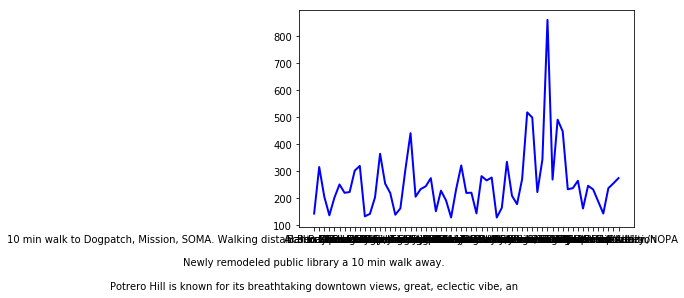

In [216]:
price_neighbourhood = listings.groupby('neighbourhood', as_index=True)['price_num'].mean()
print(price_neighbourhood.head())
plt.plot(price_neighbourhood, color='blue', linewidth=2)
plt.show()

   review_scores_rating   price_num
0                  20.0  170.206186
1                  28.0  100.000000
2                  30.0  176.818182
3                  33.0  109.800000
4                  40.0  141.750760


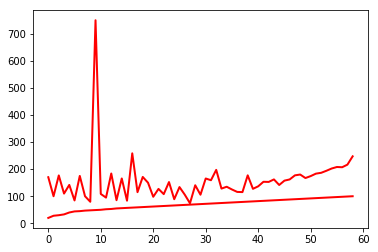

In [222]:
price_rating = listings.groupby('review_scores_rating', as_index=False)['price_num'].mean()
print(price_rating.head())
plt.plot(price_rating, color='red', linewidth=2)
plt.show()

neighbourhood
10 min walk to Dogpatch, Mission, SOMA. Walking distance to Whole Foods, Anchor Steam Brewery, Plow, Farley's Coffee. \n\nNewly remodeled public library a 10 min walk away.\n\nPotrero Hill is known for its breathtaking downtown views, great, eclectic vibe, an    98.714286
Alamo Square                                                                                                                                                                                                                                                           95.261905
Balboa Terrace                                                                                                                                                                                                                                                         94.438984
Bayview                                                                                                                                                                

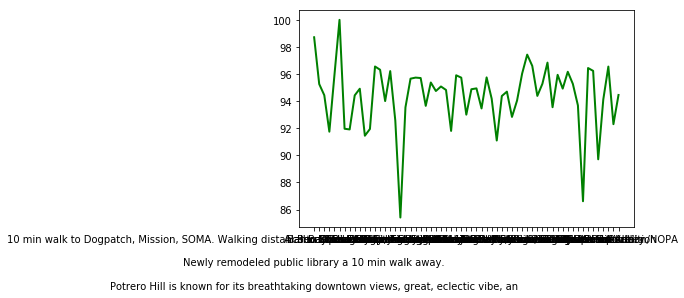

In [221]:
price_rating_neigh = listings.groupby('neighbourhood', as_index=True)['review_scores_rating'].mean()
print(price_rating_neigh.head())
plt.plot(price_rating_neigh, color='green', linewidth=2)
plt.show()

host_listings_count
0.0    93.532609
1.0    95.228400
2.0    95.062139
3.0    94.119523
4.0    93.767330
Name: review_scores_rating, dtype: float64


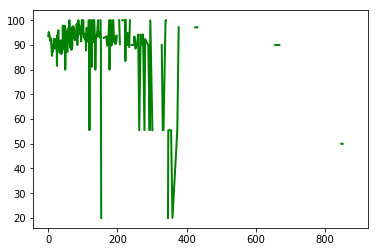

In [227]:
price_host_rating = listings.groupby('host_listings_count')['review_scores_rating'].mean()
print(price_host_rating.head())
#print(price_host_rating.max)
plt.plot(price_host_rating, color='green', linewidth=2)
plt.show()